# <center> **Atom and bond feature analysis**

<font size=4>
    
Atom and bond properties are encoded in node feature vectors $v_i$ and edge feature vectors $u_{(i,j)_k}$ using one hot encoding. For discrete values, the vectors are encoded according to the category that the value belongs to; for continuous values, the range of property values is evenly divided to 10 categories and the vectors are encoded accordingly.

##  Atom feature

<font size=4>

For the atom properties a json file is used where a dictionary is defined with the atomic number as the key and the vector one hot encoding as itś corresponding value.

In [2]:
import json  #A JSON file is a file that stores simple data structures and objects in JavaScript Object Notation (JSON) 
#format, which is a standard data interchange format. 
import numpy as np
import torch

<font size=4>
    
To read the json file and define the python dictionary, two classes are created, the first one is use to initialize the dictionary to be created and to load the state dict and the second class to read the file and store the values of the dictionary.

In [3]:
class AtomInitializer(object):
    """
    Base class for intializing the vector representation for atoms.

    !!! Use one AtomInitializer per dataset !!!
    """
    def __init__(self, atom_types):
        self.atom_types = set(atom_types) #Give the atom_types attribute to the object AtomItinializer
        self._embedding = {}  #Declare the dictionary as the embedding attribute

    def get_atom_fea(self, atom_type): #Function to return the vaule of the corresponding atom_type key
        assert atom_type in self.atom_types 
        return self._embedding[atom_type]

<font size=4>
    
To read the json file and define the python dictionary, two classes are created, the first one is use to initialize the dictionary to be created and to load the state dict and the second class to read the file and store the values of the dictionary.

In [4]:
class AtomCustomJSONInitializer(AtomInitializer):
    """
    Initialize atom feature vectors using a JSON file, which is a python
    dictionary mapping from element number to a list representing the
    feature vector of the element.

    Parameters
    ----------

    elem_embedding_file: str
        The path to the .json file
    """
    def __init__(self, elem_embedding_file):
        
        with open(elem_embedding_file) as f:
            elem_embedding = json.load(f) #Load the json file 
        elem_embedding = {int(key): value for key, value
                          in elem_embedding.items()} #Store the values in the dictionary
        atom_types = set(elem_embedding.keys()) #Set atom types 
        super(AtomCustomJSONInitializer, self).__init__(atom_types)
        for key, value in elem_embedding.items(): 
            self._embedding[key] = np.array(value, dtype=float)

In [5]:
#initialize the class
afi = AtomCustomJSONInitializer('/home/mlgraphs/CGCNN/cgcnn/data/sample-classification/atom_init.json')

In [6]:
H_atomic_number=1
H_feature_vector=afi.get_atom_fea(H_atomic_number)
H_feature_vector

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0.])

In [7]:
La_atomic_number=57
La_feature_vector=afi.get_atom_fea(La_atomic_number)
La_feature_vector

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0.])

<font size=4>

But what does this vector represent?
    
Let's explain it with help of the periodic table

<img  width="700" height="400" src="Media/p_table.svg" />

<img  width="600" height="200" src="Media/HLa.png" />

<font size=4>

The first 19 places of the vector correspond to the group number. but why 19 places if there are only 18 groups?, well, the first place of the vector is defined as a new group to classify the elements called rare earths.        

In [8]:
print('The group number as one hot encoding of the element H is: \n',H_feature_vector[:19])
print('The group number as one hot encoding of the element La is: \n',La_feature_vector[:19])

The group number as one hot encoding of the element H is: 
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The group number as one hot encoding of the element La is: 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<font size=4>

The next 7 places of the vector correspond to the period number, remember that the lanthanides are period 6 and the actinides period 7.  

In [9]:
print('The period number as one hot encoding of the element H is: \n',H_feature_vector[19:26])
print('The period number as one hot encoding of the element La is: \n',La_feature_vector[19:26])

The period number as one hot encoding of the element H is: 
 [1. 0. 0. 0. 0. 0. 0.]
The period number as one hot encoding of the element La is: 
 [0. 0. 0. 0. 0. 1. 0.]


<font size=4>

The next 10 places of the vector correspond to the electronegativity, as it is a continuous number then it is divided into 10 categories where each category is a range of values, in this case given that the electronegativity varies from 0.5 to 4.0 the first category will go from 0.5-0.85, the second from 0.85-1.20 ... and the tenth category from 3.65-4.0.

In [10]:
print('The electronegativity as one hot encoding of the element H is: \n',H_feature_vector[26:36])
print('The electronegativity as one hot encoding of the element la is: \n',La_feature_vector[26:36])

The electronegativity as one hot encoding of the element H is: 
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The electronegativity as one hot encoding of the element la is: 
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<font size=4>

The next 10 places of the vector correspond to the covalent radius, again is a continuous number then it is divided into 10 categories where each category is a range of values, in this case given that the covalent radius varies from 25 to 250 the first category will go from 25-47.5, the second from 47.5-70 ... and the tenth category from 227.5-250.

In [11]:
print('The covalent radius as one hot encoding of the element H is: \n',H_feature_vector[36:46])
print('The covalent radius as one hot encoding of the element la is: \n',La_feature_vector[36:46])

The covalent radius as one hot encoding of the element H is: 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The covalent radius as one hot encoding of the element la is: 
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<font size=4>

The next 12 places of the vector correspond to the valence electrons.

In [12]:
print('The valence electrons as one hot encoding of the element H is: \n',H_feature_vector[46:58])
print('The valence electrons as one hot encoding of the element La is: \n',La_feature_vector[46:58])

The valence electrons as one hot encoding of the element H is: 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The valence electrons as one hot encoding of the element La is: 
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<font size=4>

The next 10 places of the vector correspond to the first ionization energy, again is a continuous number then it is divided into 10 categories where each category is a range of values, in this case given that the first ionization energy values are very large, logarithm is applied to scale down and thus the range log values go from 1.3 eV to 3.3 eV thus the first category will go from 1.3-1.5, the second from 1.5-1.7. ... and the tenth category from 3.1-3.3.    

In [13]:
print('The first ionization energy as one hot encoding of the element H is: \n',H_feature_vector[58:68])
print('The first ionization energy as one hot encoding of the element La is: \n',La_feature_vector[58:68])

The first ionization energy as one hot encoding of the element H is: 
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The first ionization energy as one hot encoding of the element La is: 
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


<font size=4>

The next 10 places of the vector correspond to the electron affinity, again is a continuous number then it is divided into 10 categories where each category is a range of values, in this case given that the electron affinity varies from -3 eV to 3.7 eV the first category will go from -3-2.33, the second from -2.33--1.66 ... and the tenth category from 3.03-3.7.

In [14]:
print('The electron affinity as one hot encoding of the element H is: \n',H_feature_vector[68:78])
print('The electron affinity as one hot encoding of the element La is: \n',La_feature_vector[68:78])

The electron affinity as one hot encoding of the element H is: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The electron affinity as one hot encoding of the element La is: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<font size=4>

The next 4 places of the vector correspond to the block. The range is: s,p,d,f.

In [15]:
print('The block as one hot encoding of the element H is: \n',H_feature_vector[78:82])
print('The block as one hot encoding of the element La is: \n',La_feature_vector[78:82])

The block as one hot encoding of the element H is: 
 [1. 0. 0. 0.]
The block as one hot encoding of the element La is: 
 [0. 0. 0. 1.]


<font size=4>

The next 10 places of the vector correspond to the atomic volume, again is a continuous number then it is divided into 10 categories where each category is a range of values, in this case given that the atomic volume values are large, logarithm is applied to scale down and thus the range log values go from 1.5 $cm³/mol$ to 4.3 $ cm³/mol$ thus the first category will go from 1.5-1.78, the second from 1.78-2.06 ... and the tenth category from 4.02-4.3.    

In [16]:
print('The atomic volume as one hot encoding of the element H is: \n',H_feature_vector[82:92])
print('The atomic volume as one hot encoding of the element La is: \n',La_feature_vector[82:92])

The atomic volume as one hot encoding of the element H is: 
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The atomic volume as one hot encoding of the element La is: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##  Bond feature

<font size=4>

For the bond properties a class is also created to expand the distances already given with a Gaussian basis
    
The Gaussian filter is defined as follows

$$e^{-\left(\frac{(d-\mu_k)^2}{\sigma^²}\right)}$$
    
with $d$ the interactomic distance, $µ_k$ (also named as the filter) is equally spaced ( length k ) in the interval $[0,r_{cut}]$, and $\sigma=k$ representing the step size of the distances.
Hyperparameter $\sigma$ define the granularity of the representation, and determine the precision of the filter. $\sigma$ is  set to $0.2 Å$ in the paper.

In [17]:
class GaussianDistance(object):
    """
    Expands the distance by Gaussian basis.

    Unit: angstrom
    """
    def __init__(self, dmin, dmax, step, var=None):
        """
        Parameters
        ----------

        dmin: float
          Minimum interatomic distance
        dmax: float
          Maximum interatomic distance
        step: float
          Step size for the Gaussian filter
        """
        assert dmin < dmax
        assert dmax - dmin > step  #Check if the distance of the interval is larger than the step
        self.filter = np.arange(dmin, dmax+step, step) #define filter 
        if var is None: #Var is sigma 
            var = step  #
        self.var = var

    def expand(self, distances):
        """
        Apply Gaussian distance filter to a numpy distance array

        Parameters
        ----------

        distance: np.array shape n-d array
          A distance matrix of any shape

        Returns
        -------
        expanded_distance: shape (n+1)-d array
          Expanded distance matrix with the last dimension of length
          len(self.filter)
        """
        return np.exp(-(distances[..., np.newaxis] - self.filter)**2 /
                      self.var**2)

In [56]:
step=.2 
r_cut=5
filt=np.arange(0, r_cut+step,step)
print(filt)
print(len(filt))

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
26


In [53]:
distances=np.array([1,2,3])
apply_filter=distances[...,np.newaxis]-filt
apply_filter

array([[ 1. ,  0.8,  0.6,  0.4,  0.2,  0. , -0.2, -0.4, -0.6, -0.8, -1. ,
        -1.2, -1.4, -1.6, -1.8, -2. , -2.2, -2.4, -2.6, -2.8, -3. , -3.2,
        -3.4, -3.6, -3.8, -4. , -4.2, -4.4, -4.6, -4.8, -5. , -5.2, -5.4,
        -5.6, -5.8, -6. , -6.2, -6.4, -6.6, -6.8, -7. ],
       [ 2. ,  1.8,  1.6,  1.4,  1.2,  1. ,  0.8,  0.6,  0.4,  0.2,  0. ,
        -0.2, -0.4, -0.6, -0.8, -1. , -1.2, -1.4, -1.6, -1.8, -2. , -2.2,
        -2.4, -2.6, -2.8, -3. , -3.2, -3.4, -3.6, -3.8, -4. , -4.2, -4.4,
        -4.6, -4.8, -5. , -5.2, -5.4, -5.6, -5.8, -6. ],
       [ 3. ,  2.8,  2.6,  2.4,  2.2,  2. ,  1.8,  1.6,  1.4,  1.2,  1. ,
         0.8,  0.6,  0.4,  0.2,  0. , -0.2, -0.4, -0.6, -0.8, -1. , -1.2,
        -1.4, -1.6, -1.8, -2. , -2.2, -2.4, -2.6, -2.8, -3. , -3.2, -3.4,
        -3.6, -3.8, -4. , -4.2, -4.4, -4.6, -4.8, -5. ]])

In [54]:
apply_gaussian=np.exp(-(apply_filter)**2 /
                      step**2)
apply_gaussian

array([[1.38879439e-011, 1.12535175e-007, 1.23409804e-004,
        1.83156389e-002, 3.67879441e-001, 1.00000000e+000,
        3.67879441e-001, 1.83156389e-002, 1.23409804e-004,
        1.12535175e-007, 1.38879439e-011, 2.31952283e-016,
        5.24288566e-022, 1.60381089e-028, 6.63967720e-036,
        3.72007598e-044, 2.82077009e-053, 2.89464031e-063,
        4.02006022e-074, 7.55581902e-086, 1.92194773e-098,
        6.61626106e-112, 3.08244070e-126, 1.94351485e-141,
        1.65841048e-157, 1.91516960e-174, 2.99318445e-192,
        6.33097734e-211, 1.81225403e-230, 7.02066780e-251,
        3.68085585e-272, 2.61174176e-294, 2.50797208e-317,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [3.72007598e-044, 6.63967720e-036, 1.60381089e-028,
        5.24288566e-022, 2.31952283e-016, 1.38879439e-011,
        1.12535175e-007, 1.23409804e-004, 1.83156389e-002,
        3.678

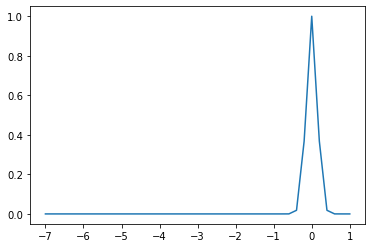

In [55]:
import matplotlib.pyplot as plt
plt.plot(apply_filter[0],apply_gaussian[0])
plt.show()